In [1]:
!pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.0/871.0 kB 13.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 4.9 MB/s eta 0:00:00


In [2]:
from IPython.display import Image as IPyImage
from ultralytics import YOLO

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.12 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:
%cd /kaggle/working

/kaggle/working


In [11]:
from kaggle_secrets import UserSecretsClient

secret_label = "roboflow_api"
secret_value = UserSecretsClient().get_secret(secret_label)

In [14]:
from roboflow import Roboflow

rf = Roboflow("E76EVi3fSXBfuMxu2znS")

project = rf.workspace("viad-optics-senior-design").project("senior-design-viad")
version = project.version(5)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Senior-Design-VIAD-5 in yolov11:: 100%|██████████| 74846/74846 [00:10<00:00, 7277.07it/s]


In [19]:
!ls /kaggle/working/Senior-Design-VIAD-5

README.dataset.txt  README.roboflow.txt  data.yaml  test  train  valid


In [84]:
model = YOLO("yolo11n.pt")

In [85]:
results = model.train(data="/kaggle/working/Senior-Design-VIAD-5/data.yaml", epochs=25,imgsz=640)

Ultralytics 8.3.12 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/Senior-Design-VIAD-5/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

wandb: Currently logged in as: furkankupcu41 (furkankupcu41-). Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed ✅


train: Scanning /kaggle/working/Senior-Design-VIAD-5/train/labels.cache... 31382 images, 627 backgrounds, 0 corrupt: 100%|██████████| 31382/31382 [00:00<?, ?it/s]

train: WARNING ⚠️ /kaggle/working/Senior-Design-VIAD-5/train/images/4_z8126b7d060d92d74599e0618_f105bec8d65461975_d20170228_m031540_c001_v0001038_t0052_png.rf.271af9b51a0ab210217ed9e01153c05e.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/Senior-Design-VIAD-5/train/images/4_z8126b7d060d92d74599e0618_f105bec8d65461975_d20170228_m031540_c001_v0001038_t0052_png.rf.73372e7a92abc86dbc381e1871557160.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/Senior-Design-VIAD-5/train/images/4_z8126b7d060d92d74599e0618_f105bec8d65461bc2_d20170228_m031756_c001_v0001038_t0052_png.rf.d6e5ba46cfddc67416575ae8b5e951e7.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/Senior-Design-VIAD-5/train/images/4_z8126b7d060d92d74599e0618_f109cae5016f21fd0_d20170225_m201447_c001_v0001038_t0018_png.rf.7a9fe62f18fcb07b0809bf0b79f24c7c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /kaggle/working/Senior-Design-VIAD-5/train/images/4_z8126b7d060d92d74599e0618_f109cae5

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7148, len(boxes) = 53521. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /kaggle/working/Senior-Design-VIAD-5/valid/labels.cache... 2734 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2734/2734 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4579. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.99G      1.367      3.569      1.584         32        640: 100%|██████████| 1962/1962 [06:24<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:22<00:00,  3.77it/s]


                   all       2734       4579      0.676      0.292      0.303      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.99G      1.383      2.565      1.582          9        640: 100%|██████████| 1962/1962 [06:08<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:20<00:00,  4.13it/s]


                   all       2734       4579      0.644      0.256      0.291      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.08G      1.449      2.471      1.635         30        640: 100%|██████████| 1962/1962 [05:59<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:24<00:00,  3.53it/s]


                   all       2734       4579      0.423      0.283      0.256      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.82G      1.467       2.31      1.651         32        640: 100%|██████████| 1962/1962 [05:57<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:22<00:00,  3.90it/s]


                   all       2734       4579      0.428      0.314      0.338      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.08G      1.385      1.992      1.579         18        640: 100%|██████████| 1962/1962 [05:58<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:22<00:00,  3.88it/s]


                   all       2734       4579      0.514      0.373      0.389      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.76G      1.325      1.805      1.533         24        640: 100%|██████████| 1962/1962 [05:52<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.32it/s]


                   all       2734       4579      0.571      0.358      0.396       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.04G      1.283      1.686      1.498         18        640: 100%|██████████| 1962/1962 [05:40<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.46it/s]


                   all       2734       4579      0.578      0.389      0.435      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.77G      1.247       1.58       1.47         12        640: 100%|██████████| 1962/1962 [05:40<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:20<00:00,  4.28it/s]


                   all       2734       4579      0.532      0.423      0.446      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.81G      1.214      1.492      1.442         26        640: 100%|██████████| 1962/1962 [05:41<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:20<00:00,  4.24it/s]


                   all       2734       4579       0.52      0.425      0.439      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       3.3G      1.184      1.417      1.417         20        640: 100%|██████████| 1962/1962 [05:41<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.33it/s]


                   all       2734       4579      0.612      0.409      0.443      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.99G      1.163      1.369        1.4         20        640: 100%|██████████| 1962/1962 [05:42<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.48it/s]


                   all       2734       4579      0.624      0.423      0.462      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.84G      1.139      1.316      1.385         11        640: 100%|██████████| 1962/1962 [05:40<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.52it/s]


                   all       2734       4579      0.627      0.429      0.475      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.81G       1.12      1.273      1.366         24        640: 100%|██████████| 1962/1962 [05:41<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.43it/s]


                   all       2734       4579       0.61      0.467      0.479      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.99G      1.094      1.228      1.351         12        640: 100%|██████████| 1962/1962 [05:41<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.47it/s]


                   all       2734       4579      0.548       0.47      0.481      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.84G      1.082      1.196      1.339         17        640: 100%|██████████| 1962/1962 [05:41<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:18<00:00,  4.55it/s]


                   all       2734       4579      0.605      0.452      0.482      0.323
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.99G      1.034      1.005      1.361          7        640: 100%|██████████| 1962/1962 [05:36<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.35it/s]


                   all       2734       4579      0.643      0.443      0.492      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         3G      1.003     0.9357      1.334          7        640: 100%|██████████| 1962/1962 [05:38<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.36it/s]


                   all       2734       4579      0.623      0.481      0.499      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.89G     0.9831     0.8898      1.316         15        640: 100%|██████████| 1962/1962 [05:35<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.45it/s]


                   all       2734       4579       0.61      0.462      0.505      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.76G     0.9578     0.8475      1.295          9        640: 100%|██████████| 1962/1962 [05:35<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:18<00:00,  4.56it/s]


                   all       2734       4579       0.61      0.451      0.502       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.88G     0.9387     0.8079      1.279         10        640: 100%|██████████| 1962/1962 [05:37<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.49it/s]


                   all       2734       4579      0.587       0.48      0.506      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      3.31G       0.92      0.779      1.264          9        640: 100%|██████████| 1962/1962 [05:36<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:18<00:00,  4.54it/s]


                   all       2734       4579       0.66      0.485      0.511      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      3.11G        0.9     0.7493      1.246          9        640: 100%|██████████| 1962/1962 [05:34<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:18<00:00,  4.61it/s]


                   all       2734       4579       0.59       0.48       0.51      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.87G     0.8795     0.7146      1.233         12        640: 100%|██████████| 1962/1962 [05:34<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:19<00:00,  4.50it/s]


                   all       2734       4579      0.616      0.469       0.51      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.94G      0.858     0.6867      1.212         10        640: 100%|██████████| 1962/1962 [05:40<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:18<00:00,  4.54it/s]


                   all       2734       4579      0.566      0.517       0.52      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      3.25G     0.8435     0.6651      1.202          8        640: 100%|██████████| 1962/1962 [05:35<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:18<00:00,  4.65it/s]


                   all       2734       4579      0.626      0.468      0.515      0.362

25 epochs completed in 2.542 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 5.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.12 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 86/86 [00:18<00:00,  4.53it/s]


                   all       2734       4579      0.565      0.518       0.52      0.364
                 bench         21         25      0.555       0.44      0.475      0.418
               bicycle        201        247      0.662      0.526      0.573      0.347
                branch          2          5       0.46        0.6      0.308      0.162
                bushes        194        393      0.835      0.583       0.61      0.423
                   car         27         81     0.0554      0.198     0.0283     0.0155
             crosswalk        497        614      0.892       0.46      0.598      0.321
                  door        176        196      0.804      0.939      0.948      0.772
              elevator        200        409      0.669      0.665      0.675      0.509
           green_light         75        122      0.155     0.0328     0.0454     0.0279
                   gun        200        240      0.747       0.65      0.716       0.45
                perso

lr/pg0,▃▆██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
lr/pg1,▃▆██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
lr/pg2,▃▆██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▂▂▂▁▁
metrics/mAP50(B),▂▂▁▃▅▅▆▆▆▆▆▇▇▇▇▇▇████████
metrics/mAP50-95(B),▂▂▁▃▄▄▅▅▅▆▆▇▇▇▇▇▇▇███████
metrics/precision(B),█▇▁▁▄▅▅▄▄▆▇▇▆▄▆▇▇▆▆▆█▆▆▅▅
metrics/recall(B),▂▁▂▃▄▄▅▅▆▅▅▆▇▇▆▆▇▇▆▇▇▇▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇▇██▇▆▆▆▅▅▅▄▄▄▄▃▃▃▂▂▂▂▁▁▁


In [86]:
model.export(format="onnx")

Ultralytics 8.3.12 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train7/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 30, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.34...
ONNX: export success ✅ 2.1s, saved as 'runs/detect/train7/weights/best.onnx' (10.1 MB)

Export complete (2.8s)
Results saved to /kaggle/working/runs/detect/train7/weights
Predict:         yolo predict task=detect model=runs/detect/train7/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train7/weights/best.onnx imgsz=640 data=/kaggle/working/Senior-Design-VIAD-5/data.yaml  
Visualize:       https://netron.app


'runs/detect/train7/weights/best.onnx'

In [101]:
!ls /kaggle/working/runs/detect/train7/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch29430.jpg
R_curve.png					  train_batch29431.jpg
args.yaml					  train_batch29432.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1728906686.6fa19f318e36.30.1  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


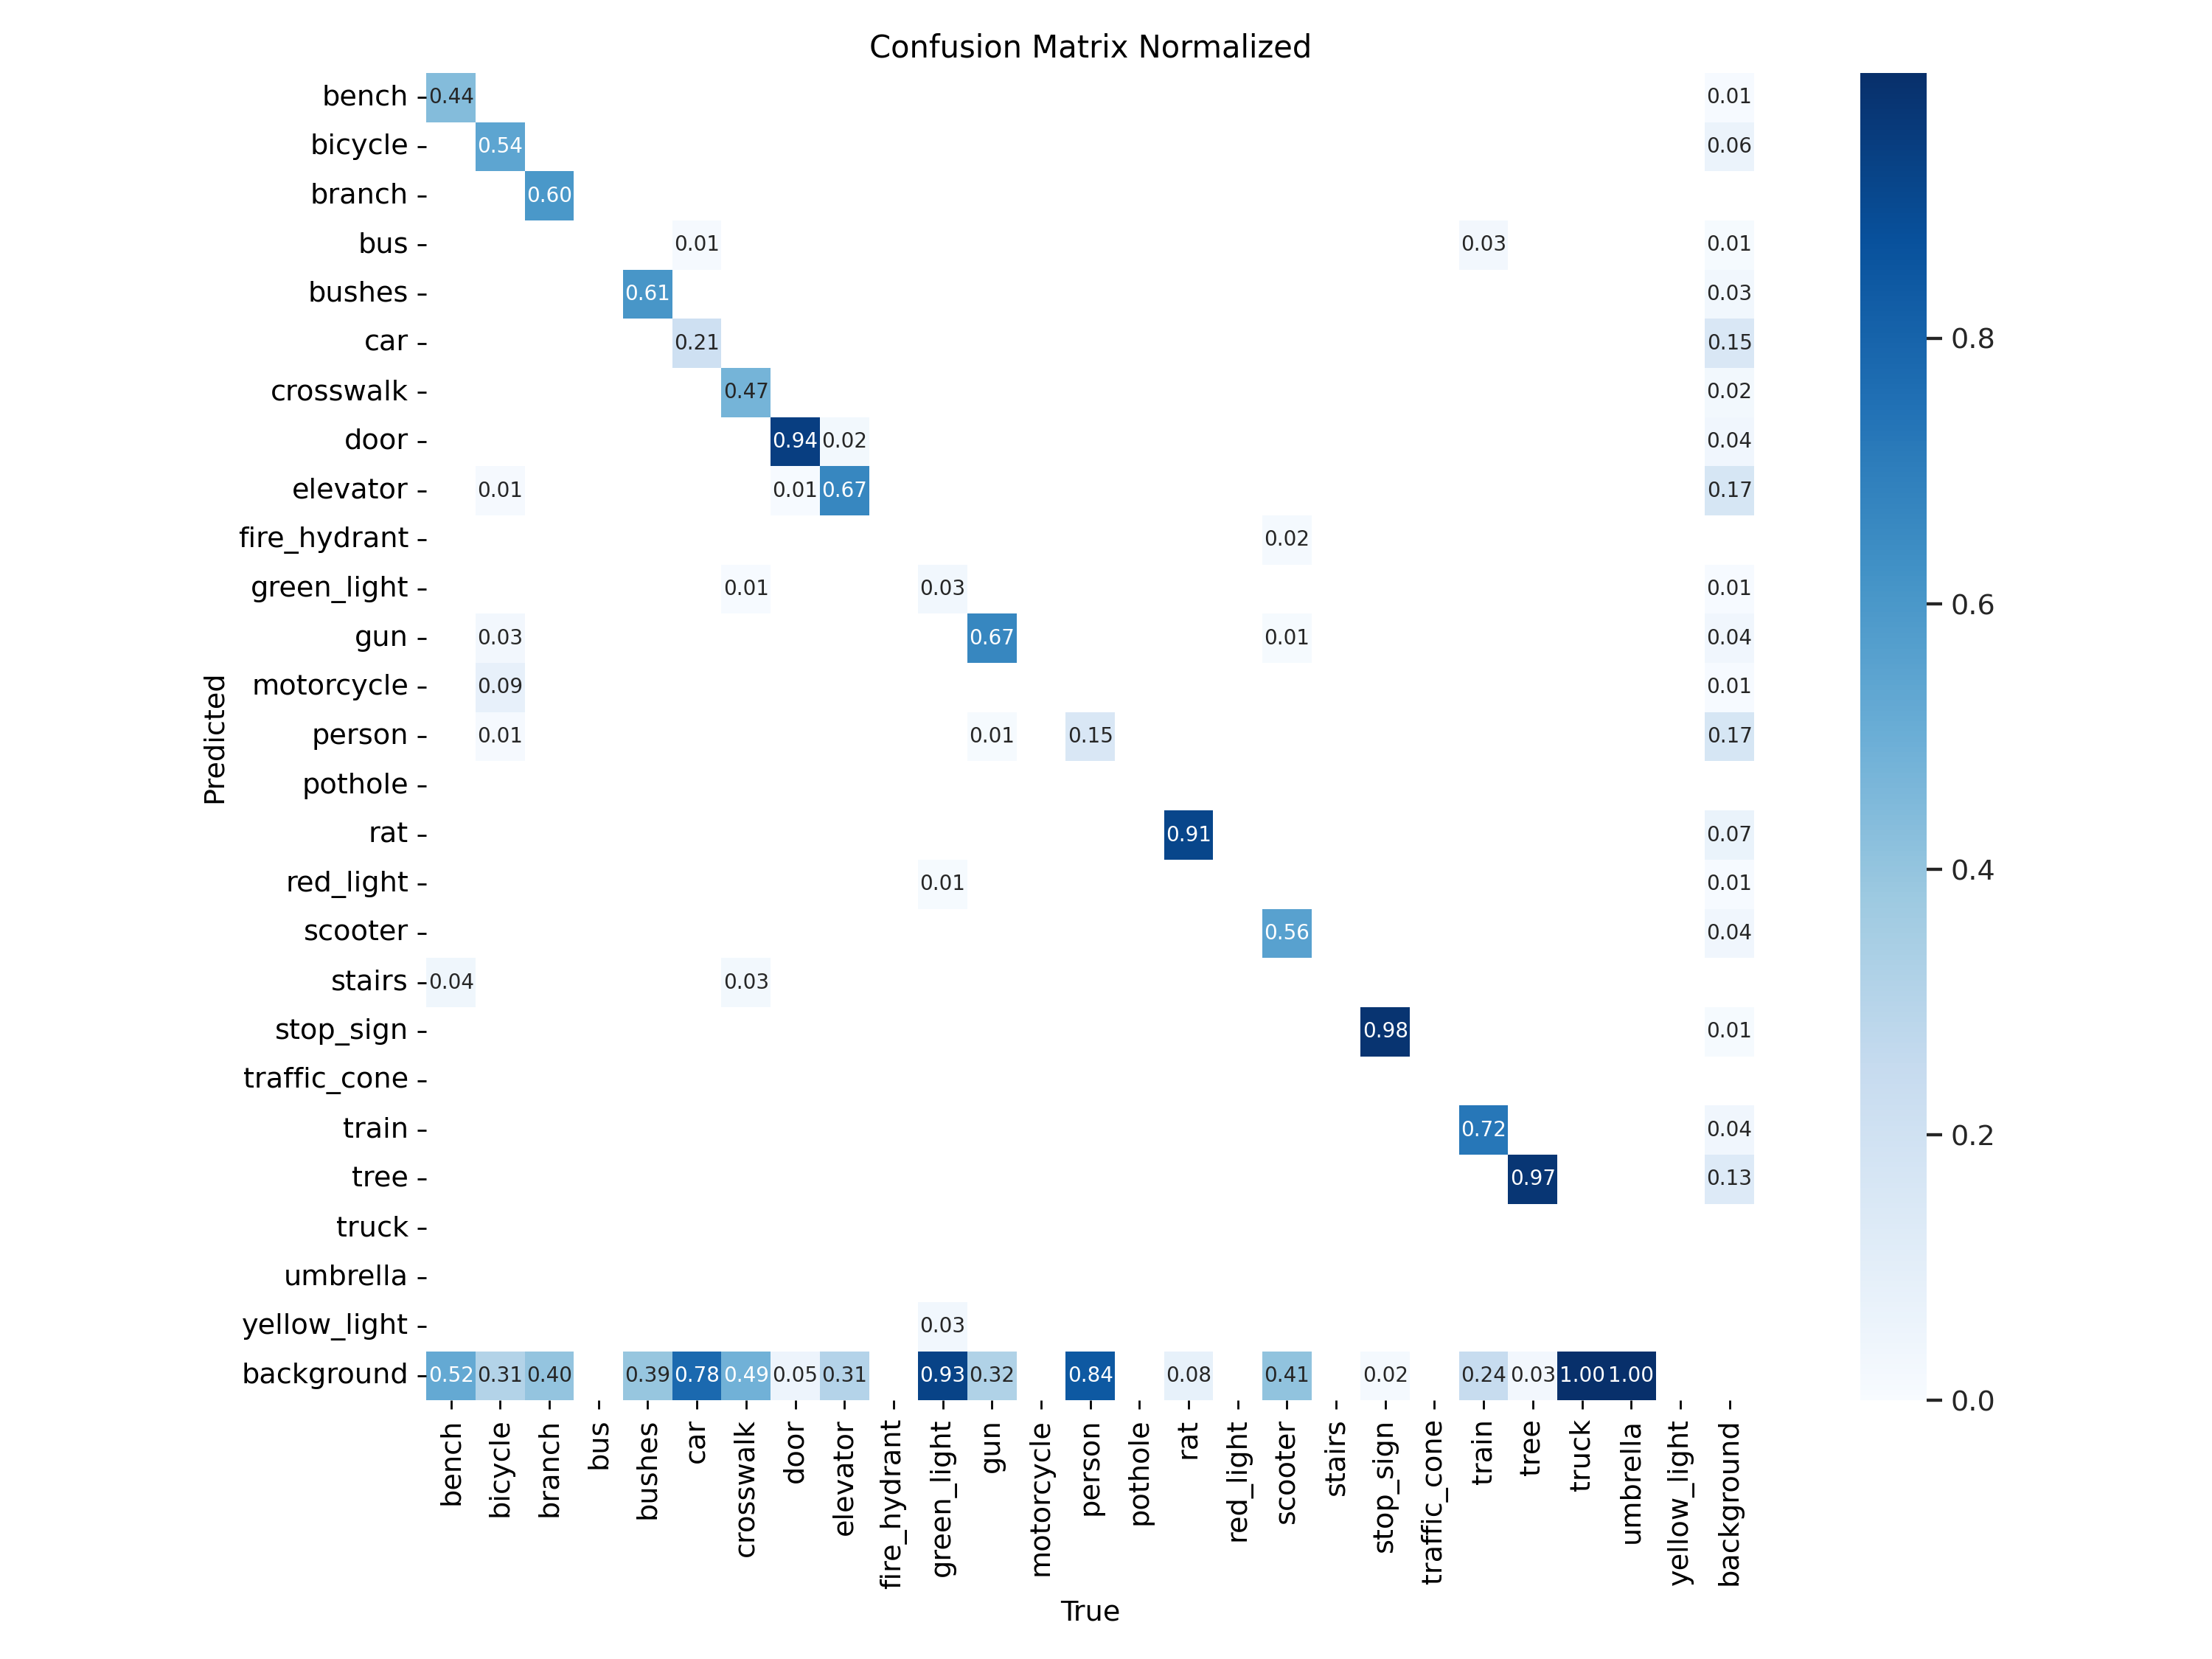

In [119]:
IPyImage(filename='/kaggle/working/runs/detect/train7/confusion_matrix_normalized.png', width=1000)

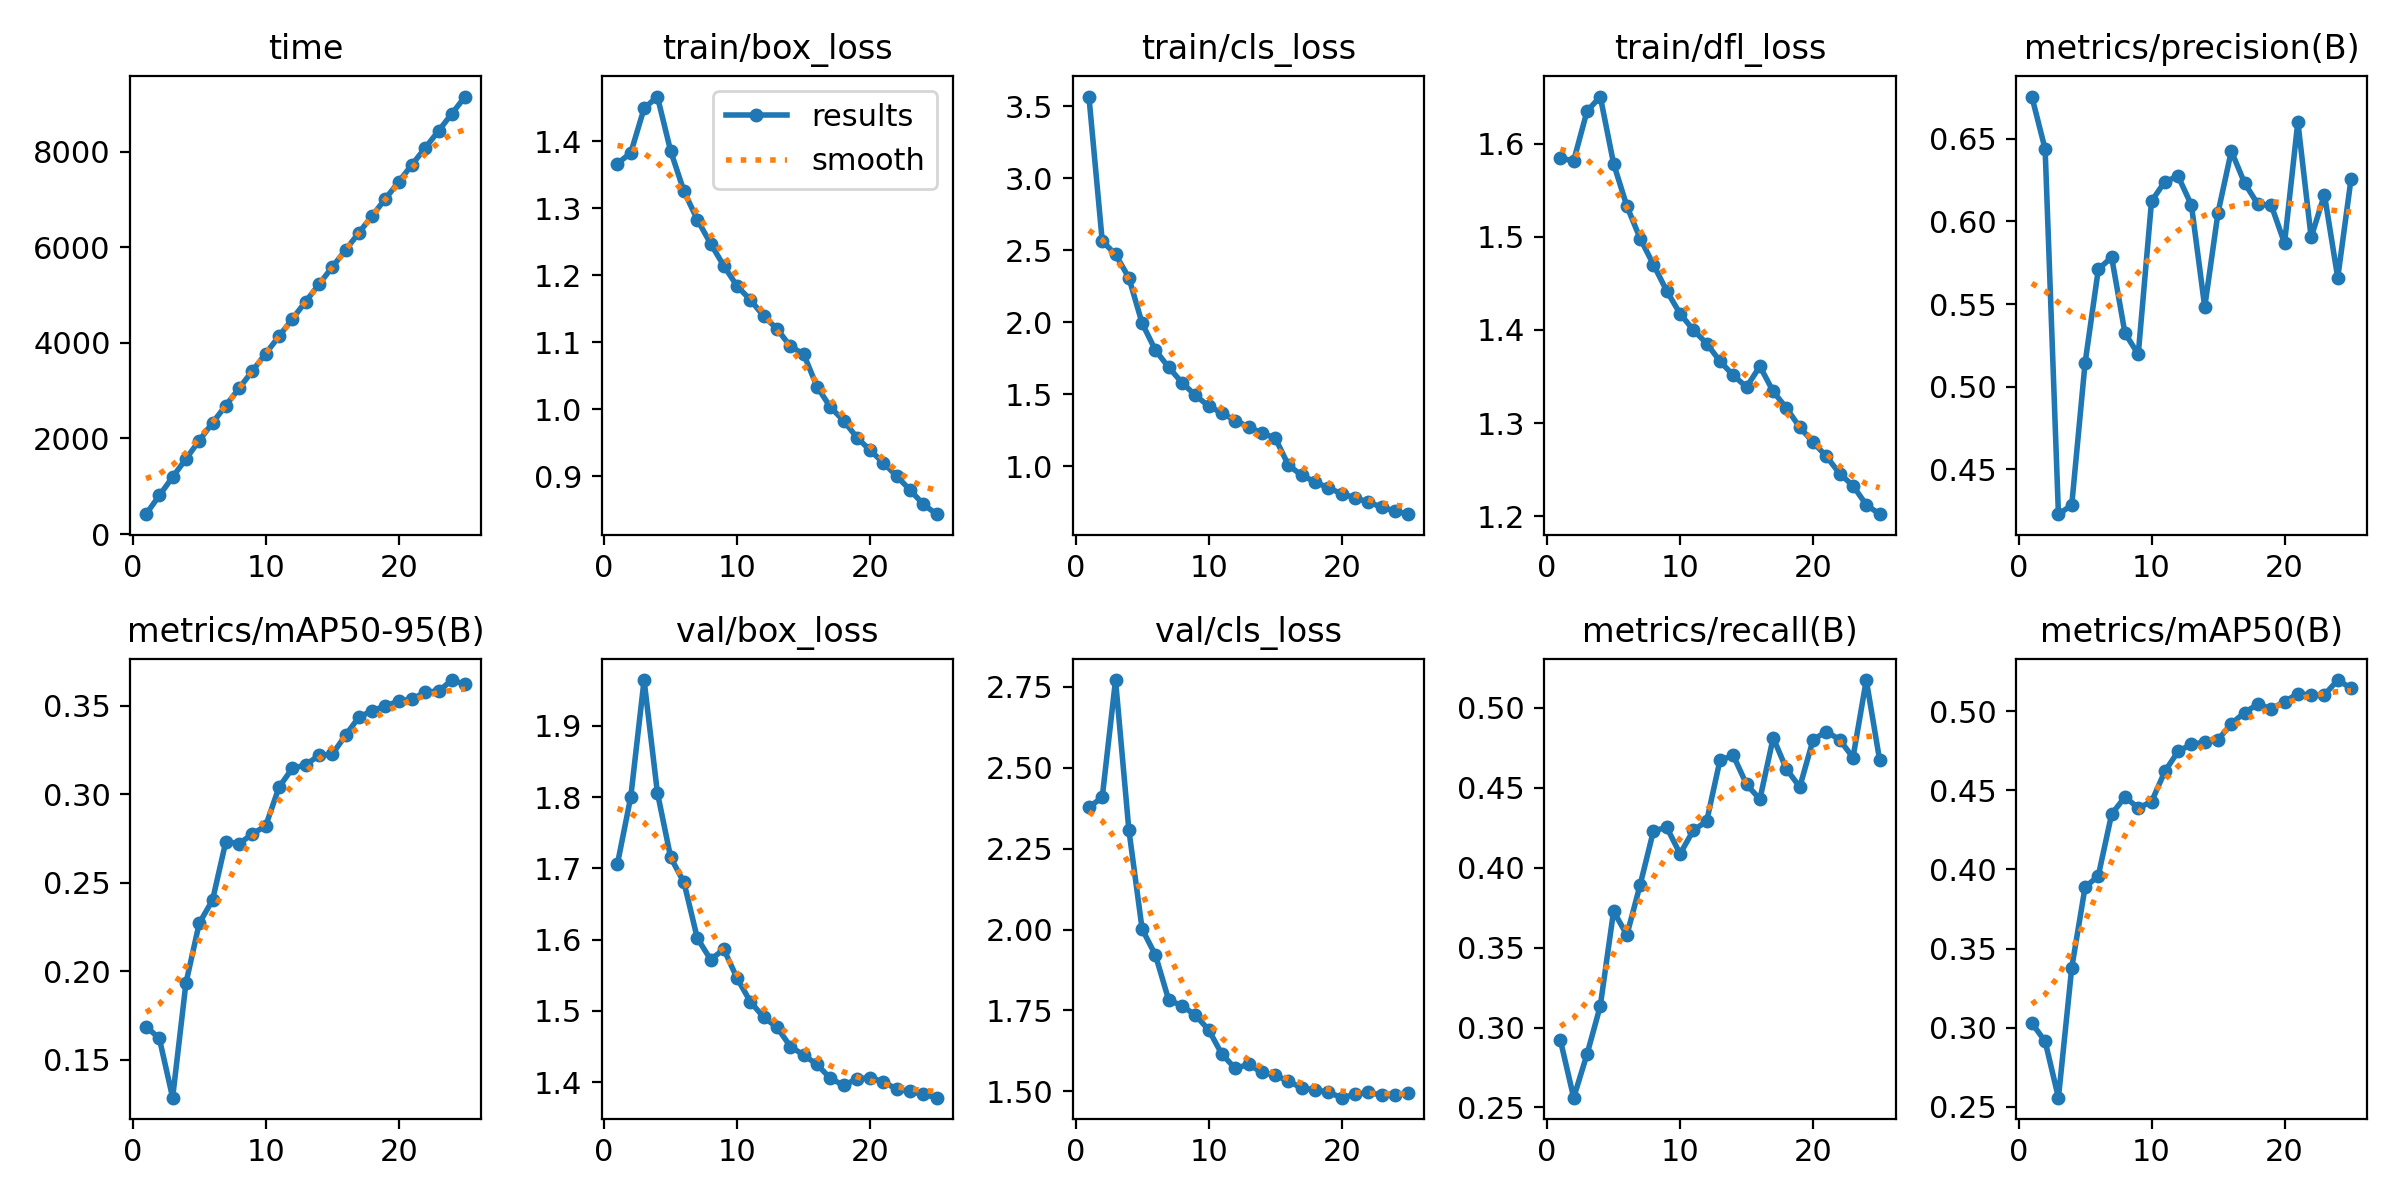

In [103]:
IPyImage(filename=f'/kaggle/working/runs/detect/train7/results.png', width=1000)

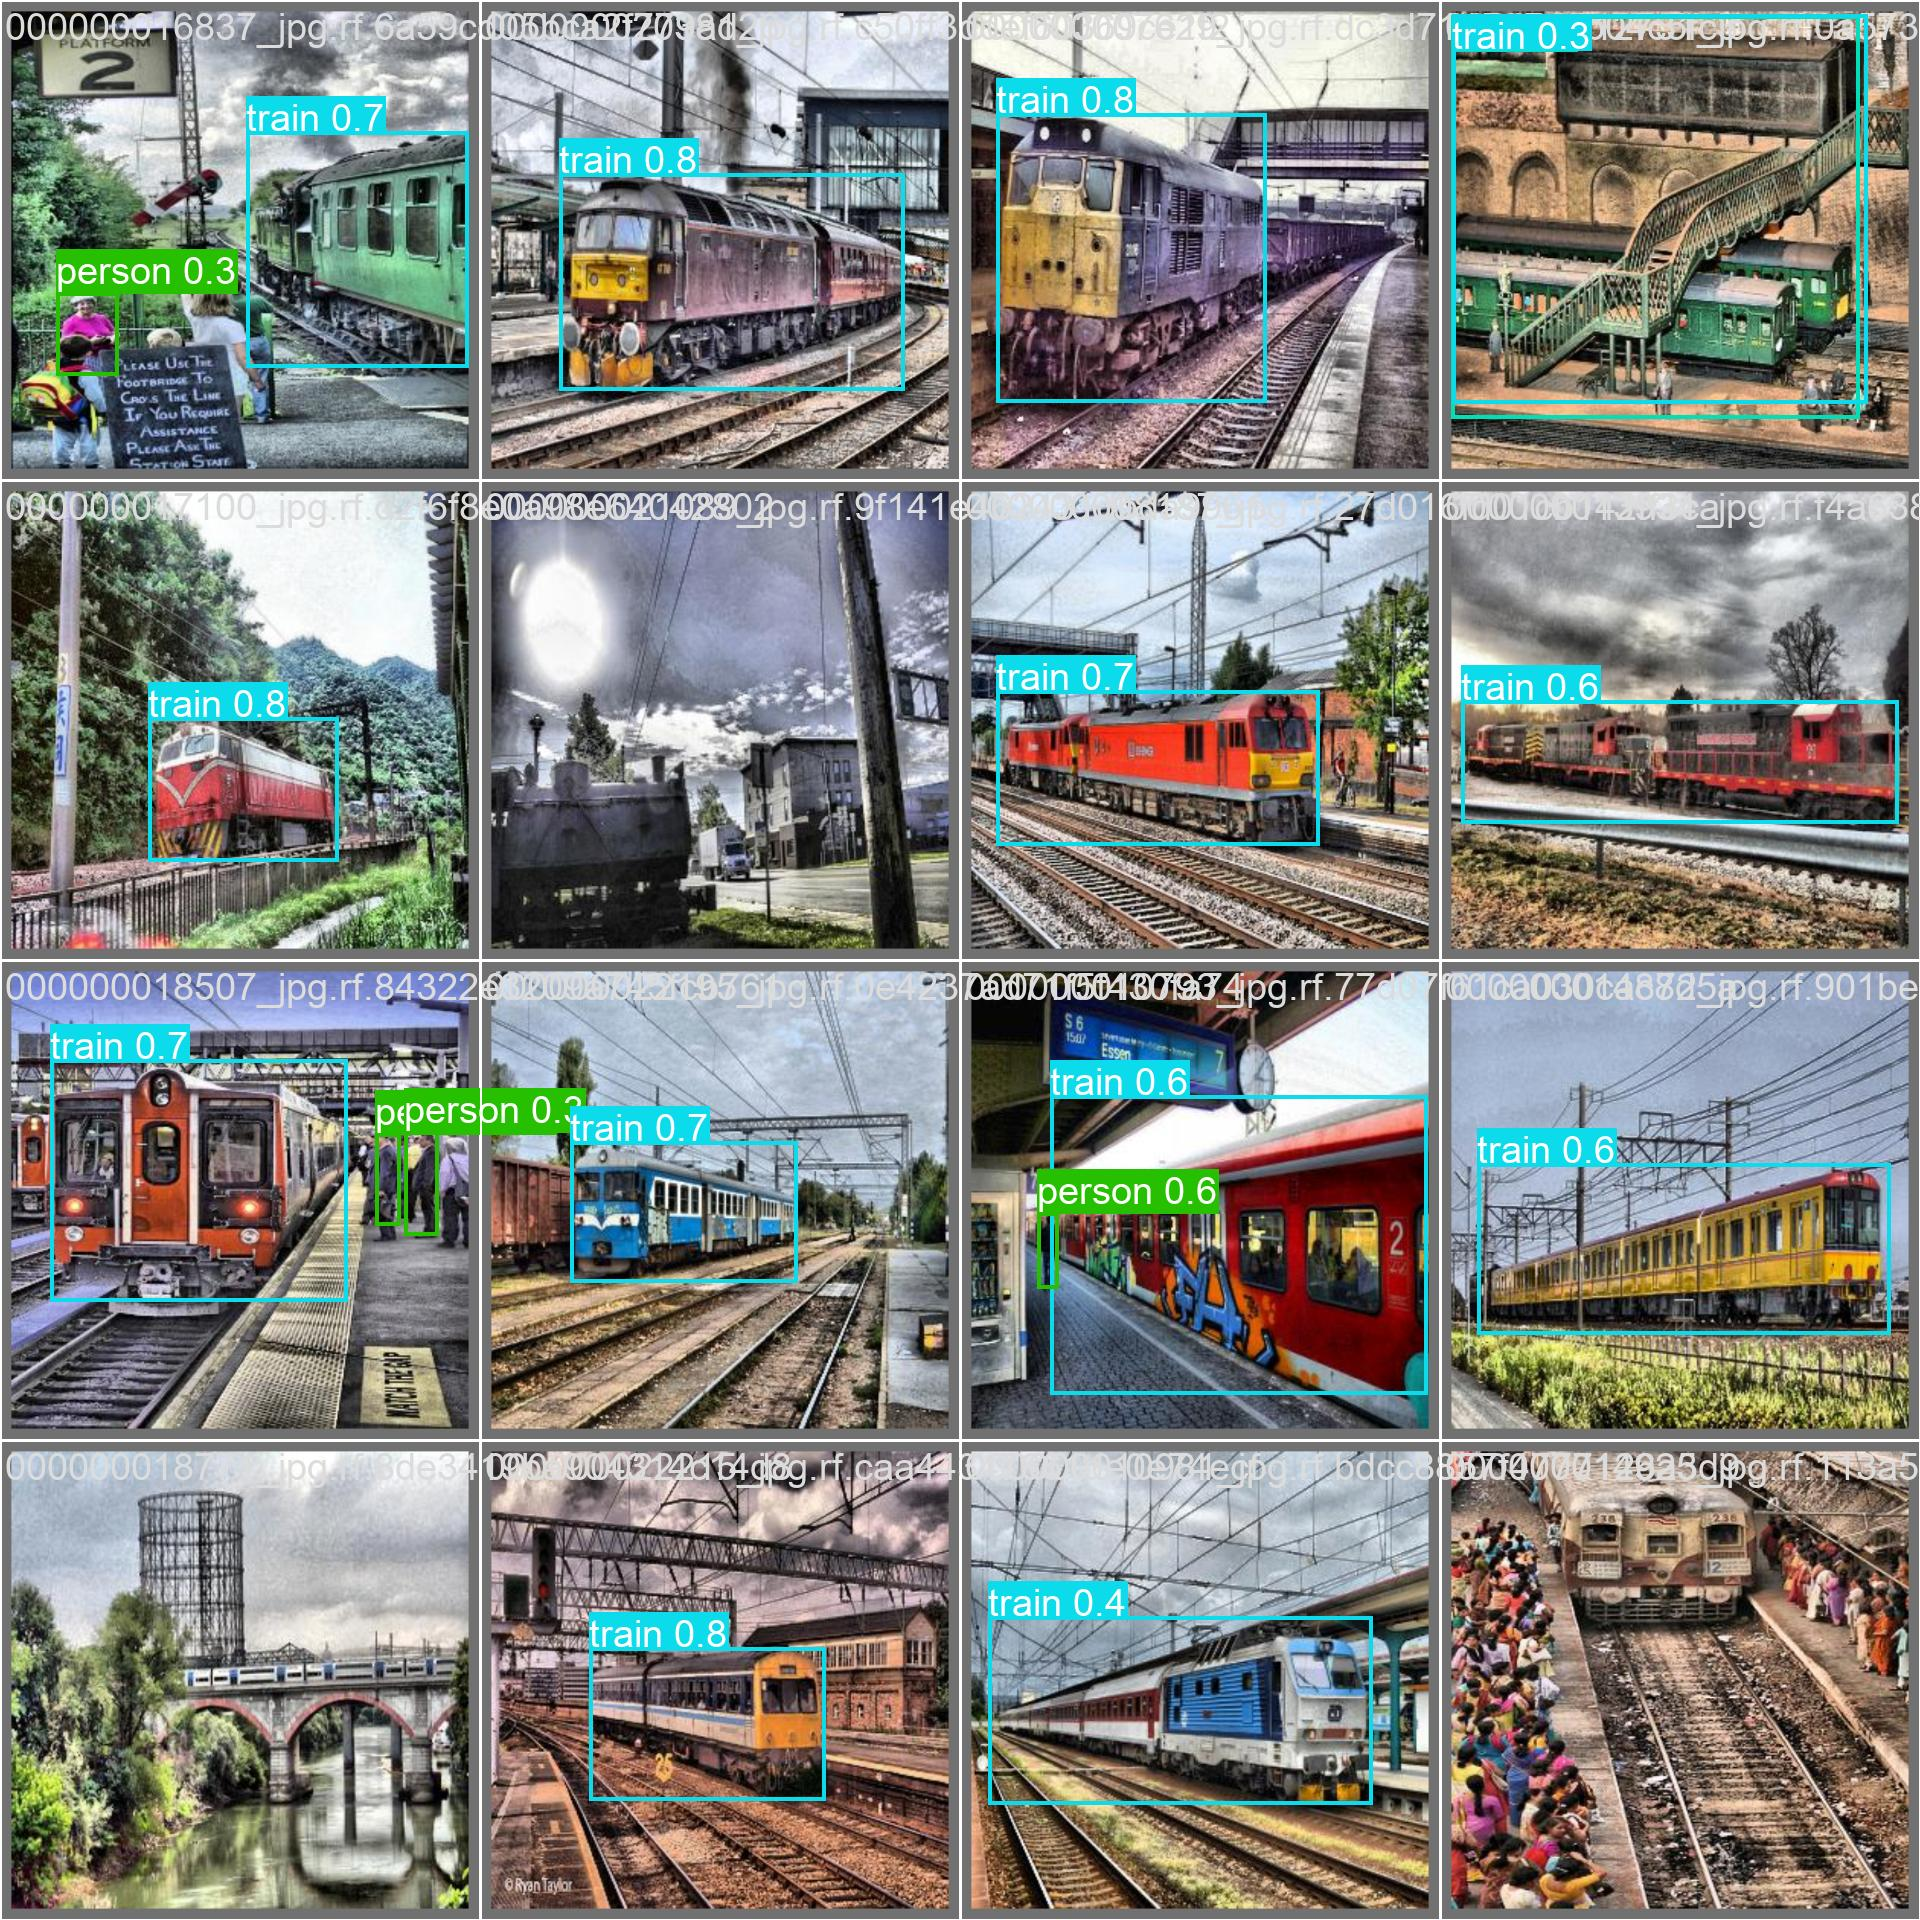

In [112]:
IPyImage(filename=f'/kaggle/working/runs/detect/train7/val_batch1_pred.jpg', width=1000)

In [91]:
validation_results = model.val(data="/kaggle/working/Senior-Design-VIAD-5/data.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")

Ultralytics 8.3.12 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,587,222 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/working/Senior-Design-VIAD-5/valid/labels.cache... 2734 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2734/2734 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 569, len(boxes) = 4579. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 171/171 [00:21<00:00,  8.13it/s]


                   all       2734       4579       0.58       0.52      0.571      0.419
                 bench         21         25      0.611       0.44      0.609      0.543
               bicycle        201        247      0.667      0.528      0.621      0.414
                branch          2          5      0.434        0.6      0.434      0.172
                bushes        194        393      0.839      0.583      0.747      0.559
                   car         27         81     0.0615      0.222     0.0396     0.0279
             crosswalk        497        614      0.896      0.461       0.68      0.414
                  door        176        196        0.8      0.939      0.946      0.791
              elevator        200        409      0.724      0.667      0.743      0.594
           green_light         75        122      0.151     0.0328     0.0959     0.0672
                   gun        200        240       0.77      0.655      0.764      0.526
                perso

In [92]:
print(validation_results.box.map)
print(validation_results.box.map50)
print(validation_results.box.map75)

0.41878981889111994
0.5707675367216692
0.4542937423949801


In [93]:
!ls /kaggle/working/Senior-Design-VIAD-5/test/images/

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


-0573F94C-289D-4503-A571-94C6C8C5674C-png_jpg.rf.dc2cb96423502784d8c8334ee78e7fc6.jpg
-13AD8372-CDDB-4DCF-B8F9-DC10D210064B-png_jpg.rf.8ac002ec2a1a40b3cf90559a655f90e8.jpg
-1F999A49-2799-4FBC-811D-D10A165F8B02-png_jpg.rf.4391e76045dce6aa36d55e817f9e2b45.jpg
-2-_jpeg_jpg.rf.b3ebe32c69424577dba1eab8e2d81ed0.jpg
-2021-12-18-10-20-49_png_jpg.rf.e8f8be9421ea3fa1bb1018acdd794f01.jpg
-2021-12-18-10-21-33_png_jpg.rf.cd3a5cd24149c0003cbb0ffd1d7ef24c.jpg
-2526BBBE-6B96-49DC-94B9-880E133FA549-png_jpg.rf.ed90fb80944c0b1ab5ca5b0ffa6461a6.jpg
-2B9B8378-CF94-4121-9F57-AA504E361DEC-png_jpg.rf.38a6bdd4b6f9d8df6be52439b216857c.jpg
-2B9B8378-CF94-4121-9F57-AA504E361DEC-png_jpg.rf.d0e8329c97c46045ce7a4d8579b76ed8.jpg
-3130BF7E-8143-44C3-AC0D-8068C9108560-png_jpg.rf.102cceb9ef5d866fdfdf8b4a72affa2d.jpg
-341F28F4-B515-475F-8729-F40EFDDDF0C2-png_jpg.rf.c66071cc34f8d2e78f03e00182eb1f0c.jpg
-3B056DBB-3097-4BCB-A38A-F66FA7470A6C-png_jpg.rf.45b5e5e0834587e5f3cd54b502f97085.jpg
-3B056DBB-3097-4BCB-A38A-F66FA7470A

In [94]:
test_images = ["/kaggle/working/Senior-Design-VIAD-5/test/images/000000020119_jpg.rf.af70a6390c665552f214dc1ad28d84b7.jpg", "/kaggle/working/Senior-Design-VIAD-5/test/images/00699_png.rf.0fc39475d366c69521d65cdb1a8f2eaf.jpg"]  # return a list of Results objects

In [95]:
preds = model(test_images)


0: 640x640 1 person, 8.1ms
1: 640x640 1 green_light, 8.1ms
Speed: 5.6ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


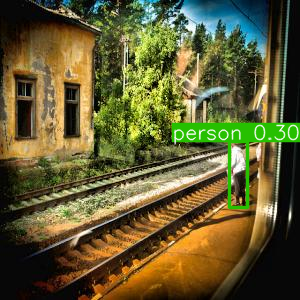

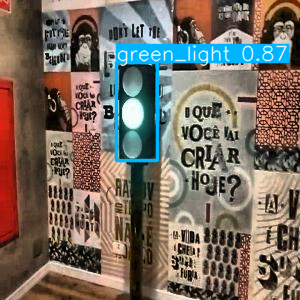

In [96]:
for result in preds:
    boxes = result.boxes
    masks = result.masks
    keypoints = result.keypoints
    probs = result.probs
    obb = result.obb
    result.show()
    result.save(filename="pred_result.jpg")